# 1. Problem Definition and Recourse Allocation

#### 1. 1. Importing libraries

In [140]:
import pandas as pd                                     #pip install pandas
from tabulate import tabulate                           #pip install tabulate
from matplotlib import pyplot as plt                    #pip install matplotlib
import seaborn as sns                                   #pip install seaborn
import numpy as np                                      #pip install numpy
from sklearn.model_selection import train_test_split    #pip install scikit-learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### 1. 2. Load Data into the Workspace

In [141]:
df = pd.read_excel("Concrete_Data.xls") #pip install xlrd  

#### 1. 3. Displays Variable Information

In [142]:
print("")
print("Variable Information:")
print("")

table = [['Component No.', 'Name', 'Quantitativity','Measurement','Description'],
         [1, 'Cement','quantitative',' kg in a m3 mixture','Input Variable'],
         [2, 'Blast Furnace Slag','quantitative',' kg in a m3 mixture','Input Variable'],
         [3, 'Fly Ash','quantitative',' kg in a m3 mixture','Input Variable'],
         [4, 'Water','quantitative',' kg in a m3 mixture','Input Variable'],
         [5, 'Superplasticizer','quantitative',' kg in a m3 mixture','Input Variable'],
         [6, 'Coarse Aggregate','quantitative',' kg in a m3 mixture','Input Variable'],
         [7, 'Fine Aggregate','quantitative',' kg in a m3 mixture','Input Variable'],
         ['N/A', 'Age','quantitative','  Day (1~365)','Input Variable'],
         ['N/A', 'Concrete compressive strength','quantitative',' MPa','Output Variable']
        ]


print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


Variable Information:

╒═════════════════╤═══════════════════════════════╤══════════════════╤════════════════════╤═════════════════╕
│ Component No.   │ Name                          │ Quantitativity   │ Measurement        │ Description     │
╞═════════════════╪═══════════════════════════════╪══════════════════╪════════════════════╪═════════════════╡
│ 1               │ Cement                        │ quantitative     │ kg in a m3 mixture │ Input Variable  │
├─────────────────┼───────────────────────────────┼──────────────────┼────────────────────┼─────────────────┤
│ 2               │ Blast Furnace Slag            │ quantitative     │ kg in a m3 mixture │ Input Variable  │
├─────────────────┼───────────────────────────────┼──────────────────┼────────────────────┼─────────────────┤
│ 3               │ Fly Ash                       │ quantitative     │ kg in a m3 mixture │ Input Variable  │
├─────────────────┼───────────────────────────────┼──────────────────┼────────────────────┼─────

#### 1. 4. Displaying the Data from .xls File 

In [143]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### 1. 5. Changning the Headers from .xls file in the Current Workspace 

In [144]:
df.rename(columns ={'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
                    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Blast Furnace Slag',
                    'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Fly Ash',
                    'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
                    'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
                    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse Aggregate',
                    'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine Aggregate',
                    'Age (day)' : 'Age',
                    'Concrete compressive strength(MPa, megapascals) ' : 'Concrete Compressive Strength'
                  },inplace=True)

df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


####  1. 6. Displaying the Correlation Between the Variables

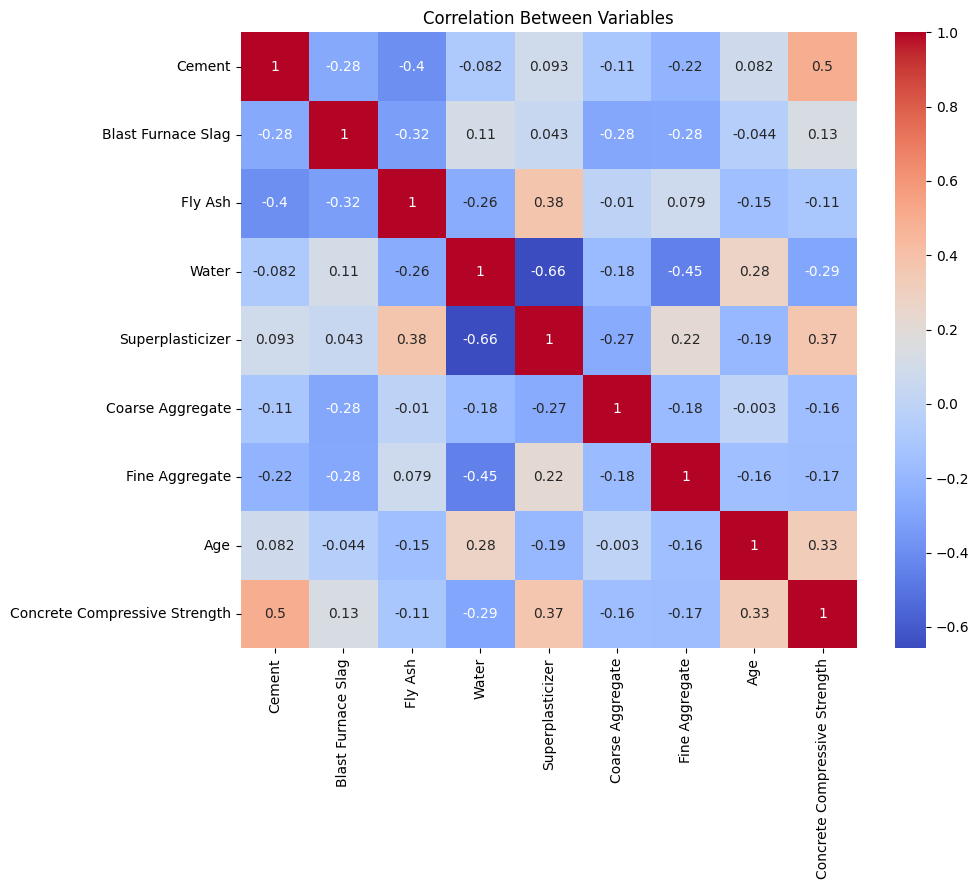

In [145]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', square=True)
plt.title('Correlation Between Variables')
plt.show()

### 1. 7. Findings

We can observe that,

 - Cement and Superplasticizer have a strong positive correlation with Concrete Compressive Strength, indicating that as the amount of Cement and Superplasticizer increases, the Concrete Compressive Strength also tends to increase.

 - Age is also positively correlated with Concrete Compressive Strength, which means that as the age increases the compressive strength also tends to increase.

 - Water, on the other hand, has a negative correlation with Concrete Compressive Strength, indicating that as the amount of Water increases, the Concrete Compressive Strength tends to decrease.

##### 1. 7. 1. Relationship Between Cement and Concrete Compressive Strength

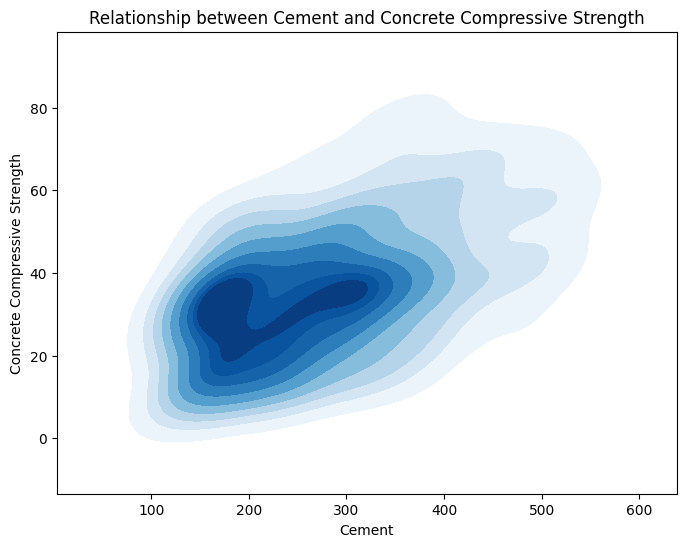

In [146]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='Cement', y='Concrete Compressive Strength', cmap='Blues', fill=True)
plt.xlabel('Cement')
plt.ylabel('Concrete Compressive Strength')
plt.title('Relationship between Cement and Concrete Compressive Strength')
plt.show()

##### 1. 7. 2.  Relationship Between Age and Concrete Compressive Strength

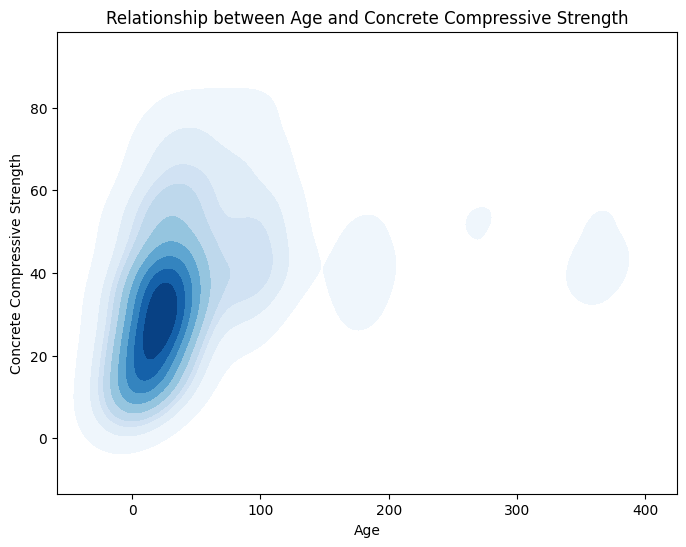

In [147]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='Age', y='Concrete Compressive Strength', cmap='Blues', fill=True)
plt.xlabel('Age')
plt.ylabel('Concrete Compressive Strength')
plt.title('Relationship between Age and Concrete Compressive Strength')
plt.show()

#### 1. 7. 3. Relationship between Water and Concrete Compressive Strength

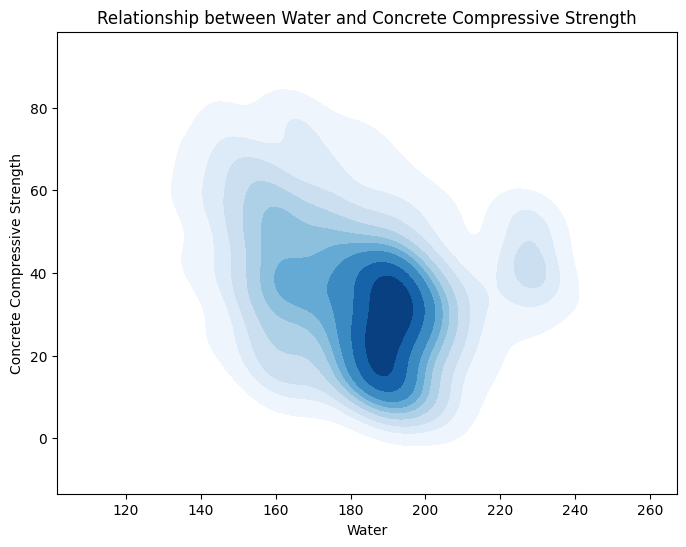

In [148]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='Water', y='Concrete Compressive Strength', cmap='Blues', fill=True)
plt.xlabel('Water')
plt.ylabel('Concrete Compressive Strength')
plt.title('Relationship between Water and Concrete Compressive Strength')
plt.show()

# 2. Data Processing

#### 2. 1. Check for missing values

In [149]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete Compressive Strength    0
dtype: int64

#### 2. 2. Filling the Missing Values

In [150]:
df.fillna(df.mean(), inplace=True)

#### 2. 3. Spliting the Data into Features and Target Variable

In [151]:
X = df.drop(['Concrete Compressive Strength'], axis=1)
y = df['Concrete Compressive Strength']

#### 2. 4. Spliting the Data into Training and Testing Sets


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2. 5. Standardizing the Values

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Selection, Training and, Evaluation

#### 3. 1. Traing the Linear Regression Model - Selection & Training

In [154]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

##### 3. 1. 1. Calculating the Mean Squared Error (MSE) - Linear Regression - Evaluation

- MSE quantifies the average squared difference between the actual values and the values predicted by the model.

In [155]:
mse_lr_strength = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Strength) - Linear Regression: {mse_lr_strength}')

Mean Squared Error (Strength) - Linear Regression: 95.97548435337708


##### 3. 1. 2. Calculating the R-squared (R²) - Linear Regression - Evaluation

- R² is a statistical measure used in regression analysis to assess the goodness of fit of a model.

In [156]:
r2_lr_strength = r2_score(y_test, y_pred)
print(f'R-squared (Strength) - Linear Regression: {r2_lr_strength}')

R-squared (Strength) - Linear Regression: 0.627541605542902


#### 3. 2. Traing the Ridge Modal - Selection & Training

In [157]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

##### 3. 2. 1. MSE - Ridge - Evaluation

In [158]:
mse_ridge_strength = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Strength) - Ridge: {mse_ridge_strength}')

Mean Squared Error (Strength) - Ridge: 95.96966712155431


##### 3. 2. 2. R² - Ridge - Evaluation

In [159]:
r2_ridge_strength = r2_score(y_test, y_pred_ridge)
print(f'R-squared (Strength) - Ridge: {r2_ridge_strength}')

R-squared (Strength) - Ridge: 0.6275641808582493


#### 3. 3. Traing the Random Forest Regressor Model - Selection & Training

In [160]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

##### 3. 3. 1. MSE - Random Forest Regressor - Evaluation

In [161]:
mse_rf_strength = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Strength) - Random Forest: {mse_rf_strength}')

Mean Squared Error (Strength) - Random Forest: 30.433631824731208


##### 3. 3. 2. R² - Random Forest Regressor - Evaluation

In [162]:
r2_rf_strength = r2_score(y_test, y_pred_rf)
print(f'R-squared (Strength) - Random Forest: {r2_rf_strength}')


R-squared (Strength) - Random Forest: 0.8818941970097077


#### 3. 4. Printing the Results of the Tests

In [163]:
print("")
print("Test Results")
print("")

table = [["AI Model Accuracy Test", "Linear Regression Model", "Ridge Model", "Random Forest Model"],
         ["MSE", mse_lr_strength,  mse_ridge_strength, mse_rf_strength],
         ["R-Squard",  r2_lr_strength, r2_ridge_strength, r2_rf_strength],
         ]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


Test Results

╒══════════════════════════╤═══════════════════════════╤═══════════════╤═══════════════════════╕
│ AI Model Accuracy Test   │   Linear Regression Model │   Ridge Model │   Random Forest Model │
╞══════════════════════════╪═══════════════════════════╪═══════════════╪═══════════════════════╡
│ MSE                      │                 95.9755   │     95.9697   │             30.4336   │
├──────────────────────────┼───────────────────────────┼───────────────┼───────────────────────┤
│ R-Squard                 │                  0.627542 │      0.627564 │              0.881894 │
╘══════════════════════════╧═══════════════════════════╧═══════════════╧═══════════════════════╛


# 4. Use the Model to Predict the  Concrete Strength and Age

In [173]:
# Input sample data
sample_data = {
    'Cement': [475],
    'Blast Furnace Slag': [0],
    'Fly Ash': [0],
    'Water': [228],
    'Superplasticizer': [0],
    'Coarse Aggregate': [932],
    'Fine Aggregate': [594],
    'Age': [39.29]

}

sample_df = pd.DataFrame(sample_data)

# Standardize the sample data
sample_scaled = scaler.transform(sample_df)

# Predict the concrete compressive strength and age
sample_pred = model.predict(sample_scaled)
sample_pred1  = model_ridge.predict(sample_scaled)
sample_pred2 =  model_rf.predict(sample_scaled)

print(f'Predicted Concrete Compressive Strength (LR) : {sample_pred[0]} MPa')
print(f'Predicted Concrete Compressive Strength (RI) : {sample_pred1[0]} MPa')
print(f'Predicted Concrete Compressive Strength (RF) : {sample_pred2[0]} MPa')





Predicted Concrete Compressive Strength (LR) : 32.396172679307796 MPa
Predicted Concrete Compressive Strength (RI) : 32.53257339551744 MPa
Predicted Concrete Compressive Strength (RF) : 39.299869999119984 MPa
